<a href="https://colab.research.google.com/github/skdixodnr/my_study/blob/main/Teample01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

data = pd.read_csv("/content/drive/MyDrive/insurance.csv")

In [ ]:
data.shape

(1338, 7)

In [ ]:
print(len(data))

1338


In [ ]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

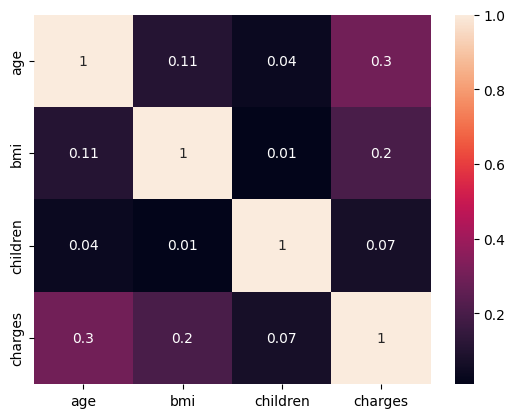

In [ ]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

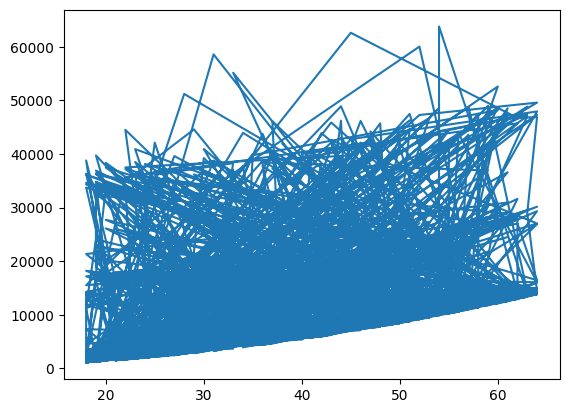

In [ ]:
x= data['age']
y= data['charges']

plt.plot(x,y)

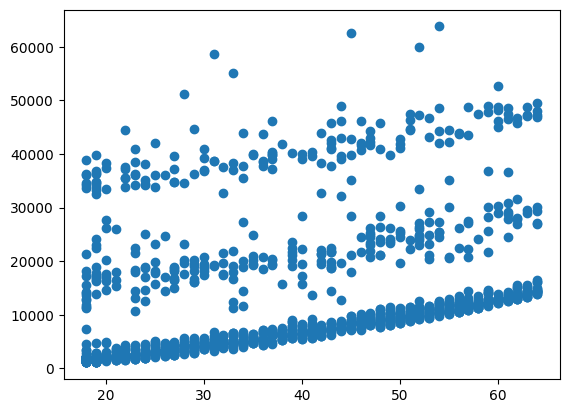

In [ ]:
plt.scatter(x,y)

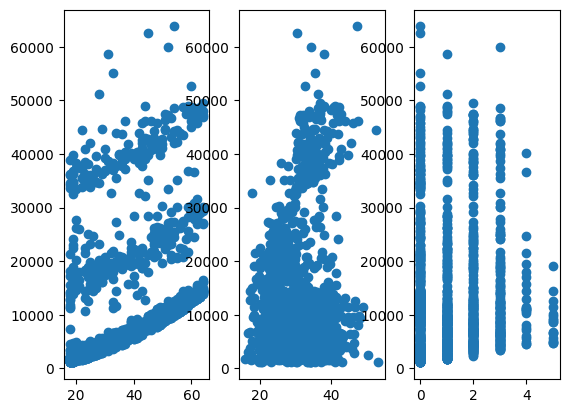

<Figure size 3000x2000 with 0 Axes>

In [ ]:
fig,axs = plt.subplots(1,3)
plt.figure(figsize=(30,20))
x1= data['age']
x2= data['bmi']
x3= data['children']
y = data['charges']

axs[0].scatter(x1,y)
axs[1].scatter(x2,y)
axs[2].scatter(x3,y)


In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

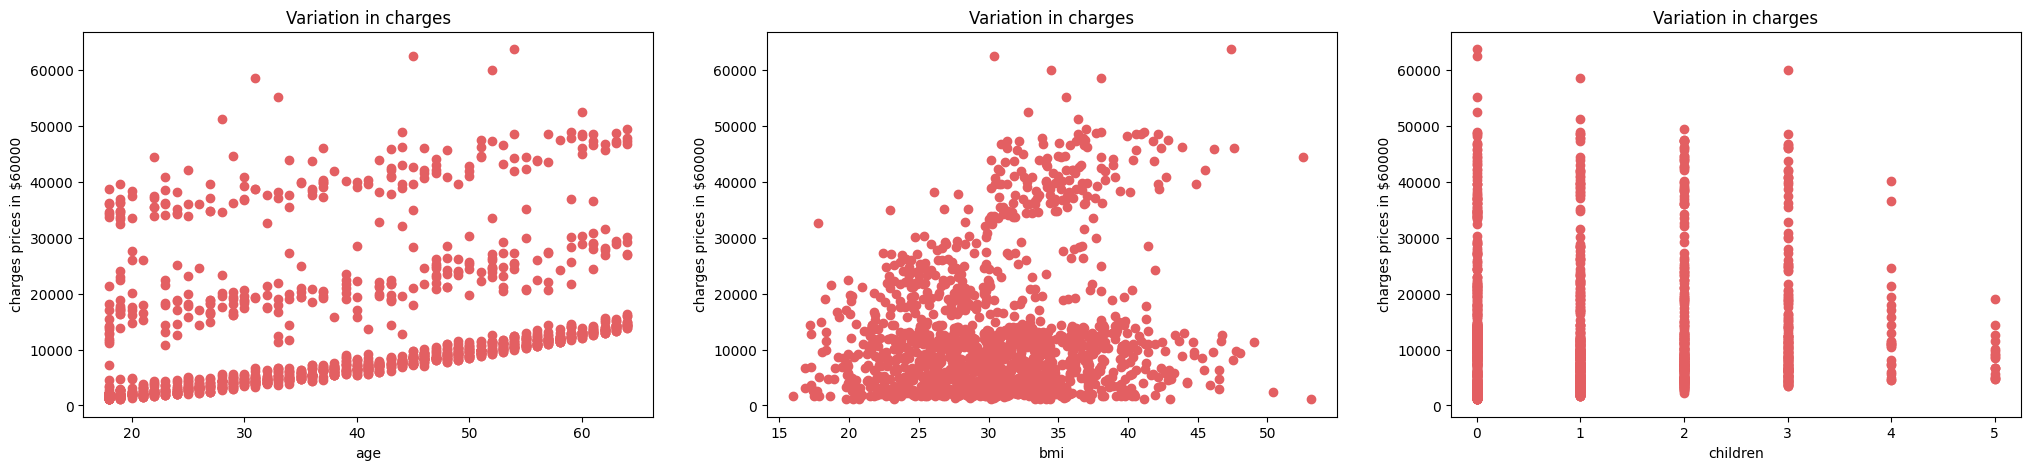

In [ ]:
plt.figure(figsize=(25,5))

features = ['age','bmi','children']
target = data['charges']

for i,col in enumerate(features):
  plt.subplot(1,len(features),i+1)
  x= data[col]
  y = target
  plt.scatter(x,y,marker='o', color='#e35f62')
  plt.title('Variation in charges')
  plt.xlabel(col)
  plt.ylabel('charges prices in $60000')

# 아이 수 별 의료비용

- 수직 평균 막대그래프

<Axes: xlabel='children', ylabel='charges'>

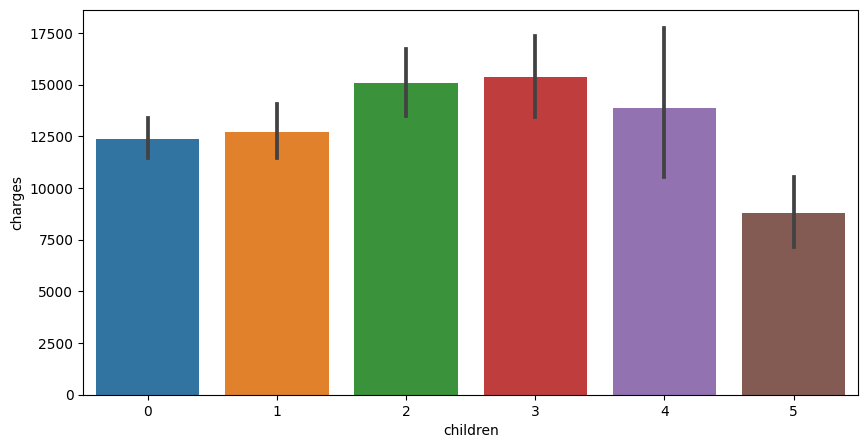

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='children', y='charges',data = data) 



In [ ]:
data.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: ylabel='children'>

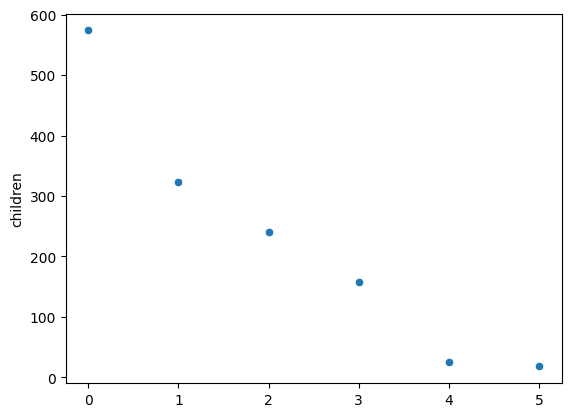

In [ ]:
sns.scatterplot(data['children'].value_counts())

In [ ]:
data_test = data[['smoker', 'children']]
data_test['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Axes: xlabel='smoker', ylabel='children'>

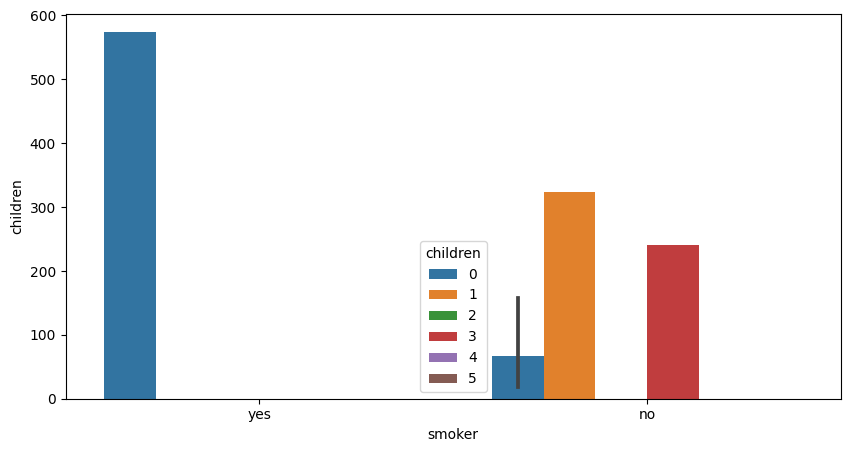

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='smoker', y=data['children'].value_counts(), hue='children' ,data = data) 

<Axes: xlabel='smoker', ylabel='charges'>

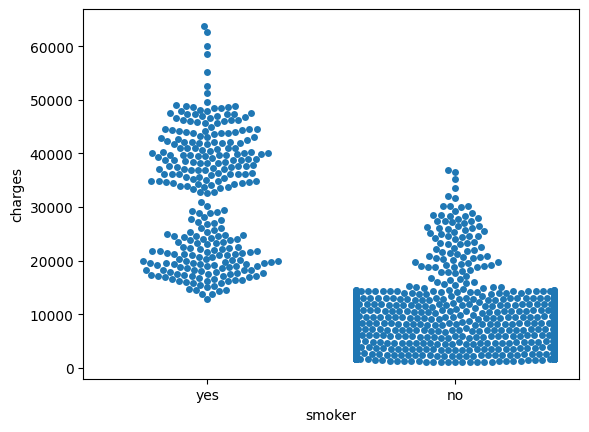

In [ ]:
sns.swarmplot(x='smoker',y='charges',data =data)

<Axes: xlabel='children', ylabel='charges'>

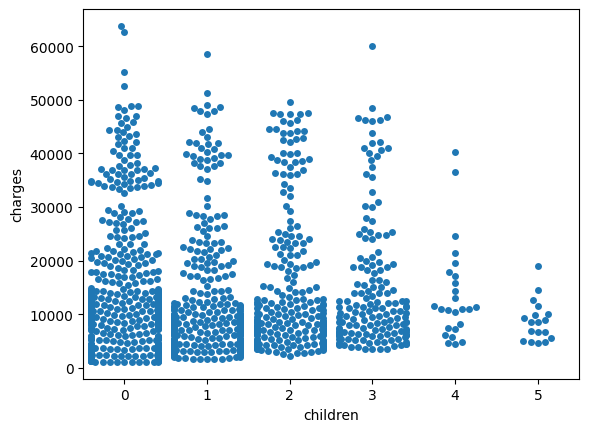

In [ ]:
sns.swarmplot(x='children',y='charges',data =data)

<Axes: xlabel='children', ylabel='charges'>

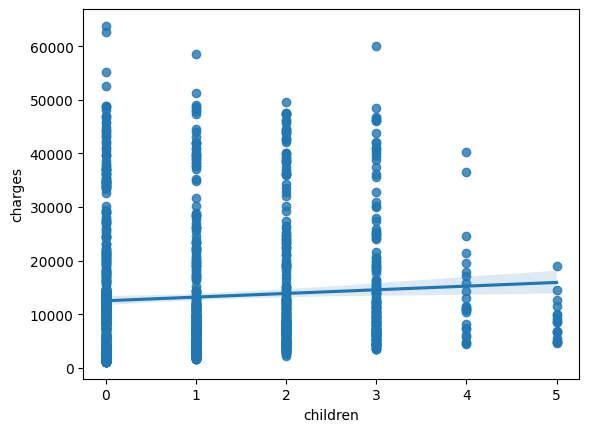

In [ ]:
sns.regplot(x='children',y='charges', data = data)

In [ ]:
#'count' 데이터에서 전체의 25%에 해당하는 데이터 조회
data_q1 = np.percentile(data['charges'],25)
data_q1

#'count' 데이터에서 전체의 75%에 해당하는 데이터 조회
data_q3 = np.percentile(data['charges'],75)
data_q3

# IQR = Q3 - Q1
data_IQR = data_q3 - data_q1
data_IQR

# 이상치를 제외한(이상치가 아닌 구간에 있는) 데이터만 조회
data_1_IQR = data[(data['charges']>=(data_q1 - (1.5*data_IQR))) &
                          (data['charges']<=(data_q3 + (1.5*data_IQR)))]
print(data_1_IQR)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1199 rows x 7 columns]


<Axes: xlabel='children', ylabel='charges'>

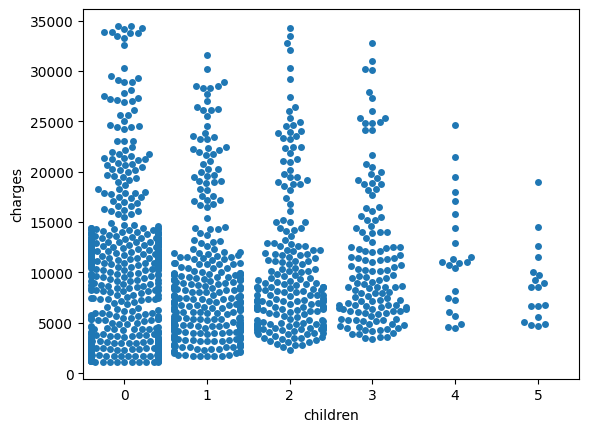

In [ ]:
sns.swarmplot(x='children',y='charges', data = data_1_IQR)

<Axes: xlabel='children', ylabel='charges'>

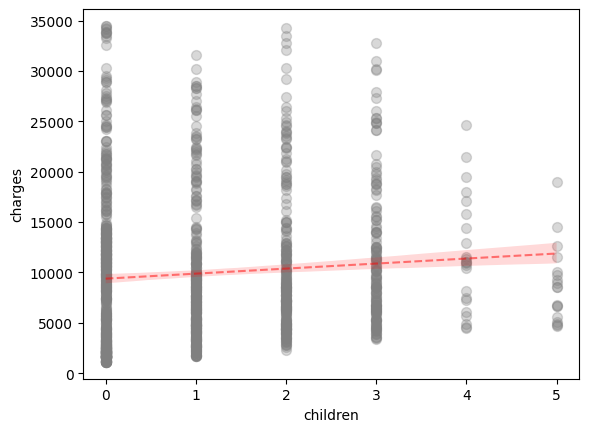

In [ ]:
sns.regplot(x='children',y='charges',
            scatter_kws={'fc':'gray', 'ec':'gray', 's':50, 'alpha':0.3},
            color='r', 
            line_kws={'lw':1.5, 'ls':'--','alpha':0.5},
            ci=90,
            data = data_1_IQR)

In [ ]:
data_1_IQR.describe()

,age,bmi,children,charges
count,1199.000000,1199.000000,1199.000000,1199.000000
mean,38.989992,30.095200,1.084237,9927.753402
std,14.068040,6.010551,1.214304,7241.158309
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.800000,0.000000,4408.695900
50%,39.000000,29.735000,1.000000,8410.046850
75%,51.000000,33.820000,2.000000,12953.594600
max,64.000000,53.130000,5.000000,34472.841000


In [ ]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data1 = data.copy()

In [ ]:
data_df = pd.DataFrame(data)

In [ ]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 2500x1000 with 0 Axes>

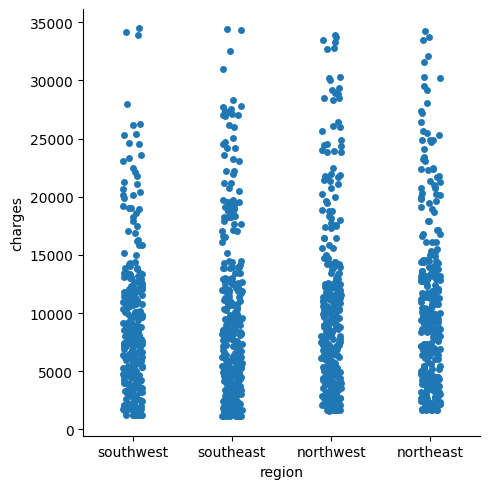

In [ ]:
plt.figure(figsize=(25,10))
sns.catplot(x='region', y='charges',data=data_1_IQR)

<Axes: xlabel='region', ylabel='charges'>

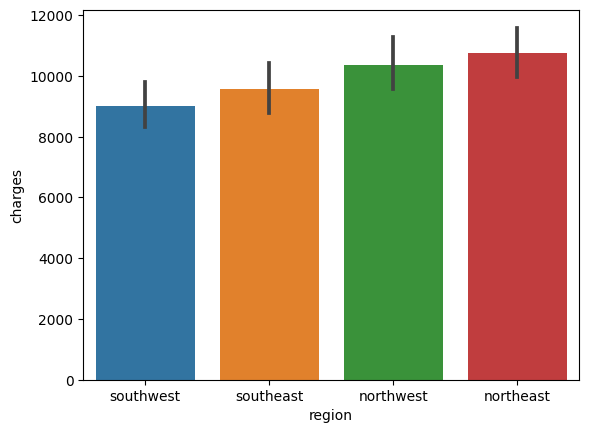

In [ ]:
sns.barplot(x='region', y='charges',data = data_1_IQR)

In [ ]:
data2 =data.copy()

In [ ]:
data2['smoker'] = data2['smoker'].map({'yes':1,'no':0})

In [ ]:
data2['sex'] = data2['sex'].map({'male':1,'female':0})

In [ ]:
data2['region'] = data['region'].map({'southwest':0,
                                      'southeast':1,
                                      'northwest':2,
                                      'northeast':3})

In [ ]:
data2

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [ ]:
import seaborn as sns

<Axes: xlabel='region', ylabel='smoker'>

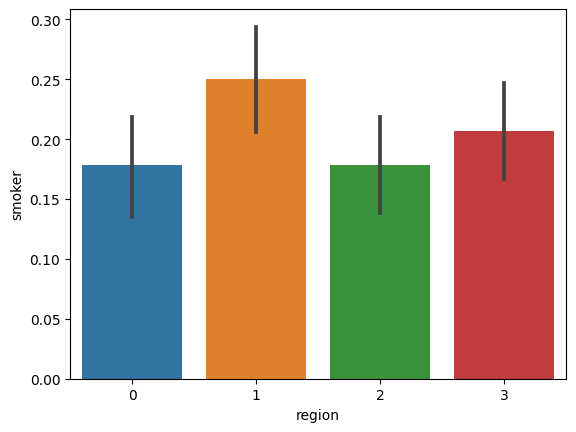

In [ ]:
sns.barplot(x='region' ,y='smoker',data=data2)

In [ ]:
data2

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


<Axes: >

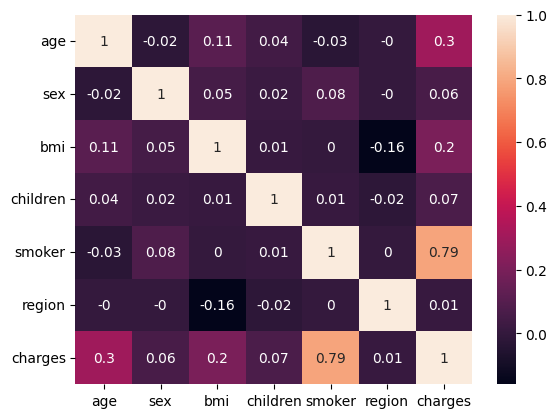

In [ ]:
correlation_matrix = data2.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

<Axes: >

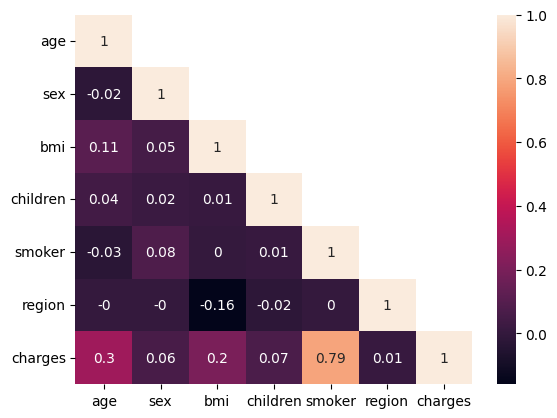

In [ ]:
correlation_matrix = data2.corr().round(2)
sns.heatmap(data=correlation_matrix,mask=mask, annot=True)

In [ ]:
data2.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


In [ ]:
corrMatt = data2.corr()
print(corrMatt)
mask = np.array(corrMatt)
#Return the indices for upper_triangle of arr.
#상삼각행렬
mask[np.tril_indices_from(mask)]=False


               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019 -0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185 -0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750 -0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673 -0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.002181  0.787251
region   -0.002127 -0.004588 -0.157566 -0.016569  0.002181  1.000000  0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251  0.006208  1.000000


NameError: ignored

In [ ]:
mask = np.array(data2.corr())
mask[np.tril_indices_from(mask)]=False
data2_corr = data2.corr().mask=mask
data2_corr

<Axes: >

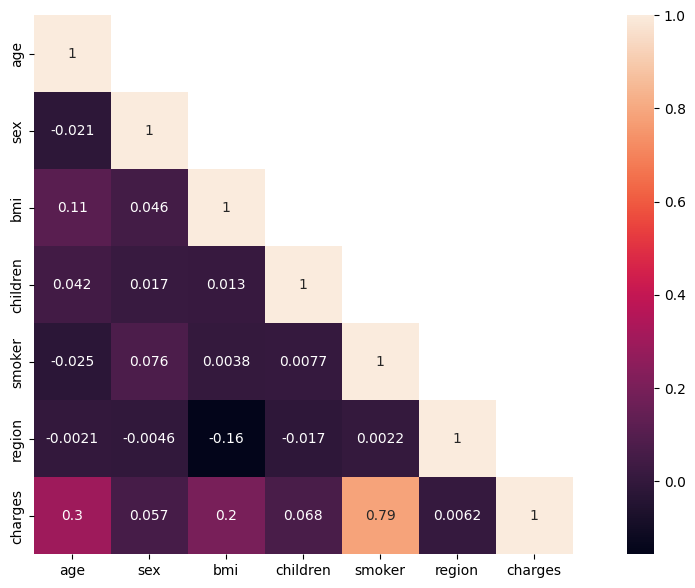

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(14,7)
sns.heatmap(data2_corr, mask=mask, vmax=1, square=True, annot=True)

<Axes: xlabel='smoker', ylabel='charges'>

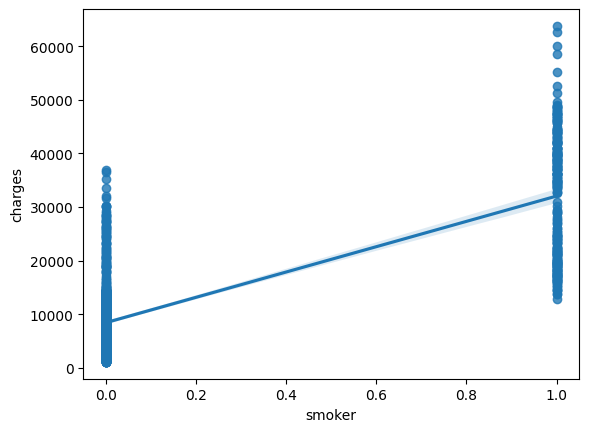

In [ ]:
sns.regplot(x='smoker',y='charges',data = data2)